In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import sqrt
import scipy.ndimage as ndimg
import matplotlib.image as img

In [2]:
def readIntensityImage(filename):
    f = img.imread(filename).astype("float")
    return f


def writeIntensityImage(f, filename):
    img.toimage(f, cmin=0, cmax=255).save(filename)


In [3]:
def createGaussianFilterBySize( size=(3,3) ):
    sigmas = [((s-1)/2)/2.575 for s in size]
    return createGaussianFilter(sigmax = sigmas[0], sigmay=sigmas[1], size=size)


In [4]:
def createGaussianFilter( sigma=1.0, sigmax=None, sigmay=None, size=None ):
  
    sigmax = sigmax or sigma
    sigmay = sigmay or sigma

    size = size or (int( np.ceil( sigmax * 2.575 ) * 2 + 1 ), int( np.ceil( sigmay * 2.575 ) * 2 + 1 ))

    msize = size[0]
    x = np.arange( msize )
    gx = np.exp( -0.5 * ( ( x-msize/2) / sigmax ) ** 2 )
    gx /= gx.sum()

    nsize = size[1]
    y = np.arange( nsize )
    gy = np.exp( -0.5 * ( ( y-nsize / 2 ) / sigmay ) ** 2 )
    gy /= gy.sum()

    G = np.outer( gx, gy )
    G /= G.sum()
    return G, gx, gy


In [8]:
def task2( img, filter2d, name="image", show=False ):
    """
    """
    
    dx, dy = np.gradient(filter2d)
    dx
    new_imgx = ndimg.convolve(img, dx)
    new_imgy = ndimg.convolve(img, dy)
    fig_name = "resulting_images/sys_task2_{}_{}x{}.png".format(name, filter2d.shape[0], filter2d.shape[1])
        
       
    fig = plt.figure()
    fig.add_subplot(2,2,1).set_title("original")
    plt.imshow(img, cmap="Greys_r")
        
    fig.add_subplot(2,2,2).set_title("|dx|")
    plt.imshow(np.abs(new_imgx), cmap="Greys_r")
    
    fig.add_subplot(2,2,3).set_title("|dy|")
    plt.imshow(np.abs(new_imgy), cmap="Greys_r")
    
    new_img = np.sqrt(np.add(np.square(new_imgx), np.square(new_imgx)))
    fig.add_subplot(2,2,4).set_title("||f*delta(g)||")
    plt.imshow(new_img, cmap="Greys_r")
    
    plt.savefig(fig_name,bbox_inches='tight')
   
    if(show):
        plt.show()
    return new_img
  

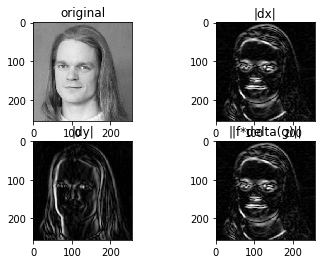

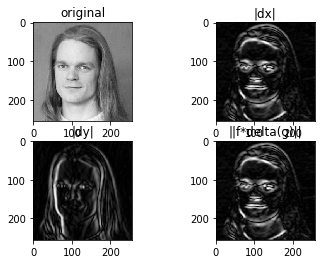

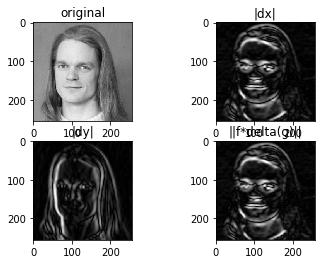

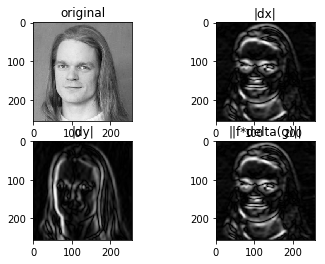

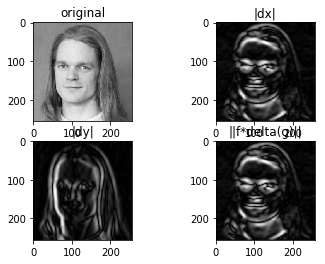

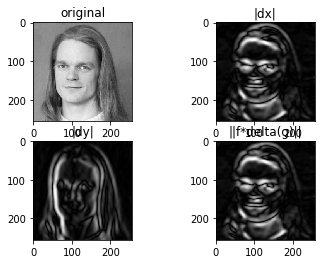

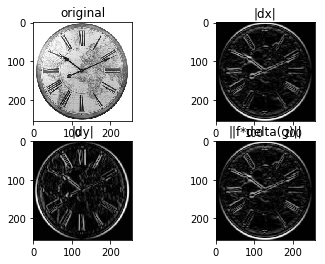

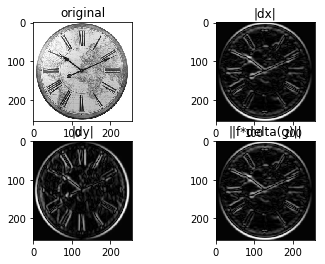

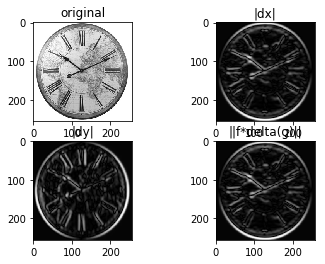

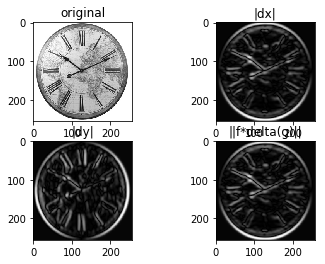

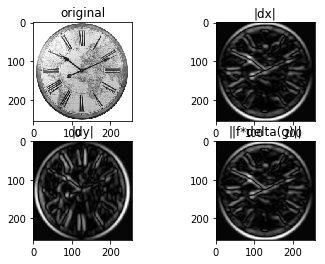

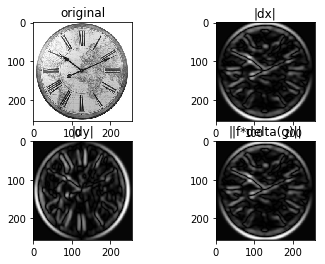

In [9]:
# Load images
face = readIntensityImage("images/bauckhage.jpg")
clock = readIntensityImage("images/clock.jpg")
 
# Run Task 2
    
sizes = range(10,22,2)
images = ["bauckhage.jpg", "clock.jpg"]
for image in images:
    for size in sizes:
        task2(
             readIntensityImage("images/{}".format(image)),
             createGaussianFilterBySize( size=(size,size) )[0],
             name=image.split(".")[0],
             show=True
             )